# Analysis of housing prices in Portugal

In [51]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sb
import numpy as np
from statsmodels.tsa.api import VAR
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller

#### Several datasets are being used to assess any relationship among housing and rental prices and other explanatory factors, such as construction costs, loan availability, inflation, and others deemed relevant.
#### Federal reserve was the main source of data for the present analysis

In [52]:
#import data from FRED
df_construction_cost = pd.read_csv('data/building_construction_cost_pt.csv')
df_cpi_pt = pd.read_csv('data/cpi_pt.csv') # consumer price index -------------------------> check the source is correct
df_credit_private_sector = pd.read_csv('data/credit_private_sector_pt.csv')
df_permits_issued = pd.read_csv('data/permits_issued_construction_pt.csv')
df_property_prices = pd.read_csv('data/property_prices_pt.csv')
df_rental_prices = pd.read_csv('data/rental_prices_pt.csv')
#import data from OECD
df_household_savings = pd.read_csv('data/household_savings_pt.csv')
df_disposable_income = pd.read_csv('data/disposable_income_pt.csv')

Check that all headers are correct

In [53]:
df_construction_cost.head()

,DATE,OPCNTB01PTM661N
0,2000-01-01,75.404007
1,2000-02-01,75.329053
2,2000-03-01,75.703824
3,2000-04-01,74.354647
4,2000-05-01,74.654464


In [54]:
df_cpi_pt.head()

,DATE,PRTCPIALLMINMEI
0,1960-01-01,1.104990
1,1960-02-01,1.111902
2,1960-03-01,1.122764
3,1960-04-01,1.100052
4,1960-05-01,1.089190


In [55]:
df_credit_private_sector.head()

,DATE,QPTPAMUSDA
0,1957-01-01,1.346
1,1957-04-01,1.398
2,1957-07-01,1.450
3,1957-10-01,1.502
4,1958-01-01,1.545


In [56]:
df_household_savings.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,PRT,HHSAV,TOT,PC_HHDI,A,2000,6.083532,NaN
1,PRT,HHSAV,TOT,PC_HHDI,A,2001,6.383318,NaN
2,PRT,HHSAV,TOT,PC_HHDI,A,2002,6.219463,NaN
3,PRT,HHSAV,TOT,PC_HHDI,A,2003,5.611222,NaN
4,PRT,HHSAV,TOT,PC_HHDI,A,2004,4.071028,NaN


In [57]:
df_permits_issued.head()

,DATE,PRTODCNPI03GPSAM
0,1994-02-01,-3.643652
1,1994-03-01,-1.122845
2,1994-04-01,2.660225
3,1994-05-01,0.582311
4,1994-06-01,2.041957


In [58]:
df_property_prices.head()

,DATE,QPTN628BIS
0,2008-01-01,101.7442
1,2008-04-01,102.0795
2,2008-07-01,99.2572
3,2008-10-01,97.5619
4,2009-01-01,98.4281


In [59]:
df_rental_prices.head()

,DATE,CP0410PTM086NEST
0,1996-01-01,62.94
1,1996-02-01,63.00
2,1996-03-01,63.06
3,1996-04-01,63.13
4,1996-05-01,63.19


In [60]:
df_construction_cost.head()

,DATE,OPCNTB01PTM661N
0,2000-01-01,75.404007
1,2000-02-01,75.329053
2,2000-03-01,75.703824
3,2000-04-01,74.354647
4,2000-05-01,74.654464


In [61]:
df_disposable_income.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,HHDI,GROSS,PC_CHGPPCAP,Q,2016-Q4,-0.06,NaN
1,AUS,HHDI,GROSS,PC_CHGPPCAP,Q,2017-Q1,0.08,NaN
2,AUS,HHDI,GROSS,PC_CHGPPCAP,Q,2017-Q2,-0.32,NaN
3,AUS,HHDI,GROSS,PC_CHGPPCAP,Q,2017-Q3,0.04,NaN
4,AUS,HHDI,GROSS,PC_CHGPPCAP,Q,2017-Q4,1.17,NaN


Rename Column Headers

In [62]:
df_disposable_income = df_disposable_income.rename(columns={'TIME': 'date','Value': 'disposable_income_percent_change'})
df_household_savings = df_household_savings.rename(columns={'TIME': 'date', 'Value': 'household_savings_percent_of_income'})
df_construction_cost = df_construction_cost.rename(columns={'DATE': 'date', 'OPCNTB01PTM661N': 'construction_cost'})
df_cpi_pt = df_cpi_pt.rename(columns={'DATE': 'date', 'PRTCPIALLMINMEI': 'cpi'})
df_credit_private_sector =  df_credit_private_sector.rename(columns={'DATE': 'date', 'QPTPAMUSDA': 'credit_private_sector'})
df_permits_issued =  df_permits_issued.rename(columns={'DATE': 'date', 'PRTODCNPI03GPSAM': 'permits_issued'})
df_property_prices =  df_property_prices.rename(columns={'DATE': 'date', 'QPTN628BIS': 'property_prices'})
df_rental_prices =  df_rental_prices.rename(columns={'DATE': 'date', 'CP0410PTM086NEST': 'rental_prices'})

Check data types

In [63]:
print(df_disposable_income.dtypes)
print(df_household_savings.dtypes)
print(df_construction_cost.dtypes)
print(df_cpi_pt.dtypes)
print(df_credit_private_sector.dtypes)
print(df_permits_issued.dtypes)
print(df_property_prices.dtypes)
print(df_rental_prices.dtypes)

LOCATION                             object
INDICATOR                            object
SUBJECT                              object
MEASURE                              object
FREQUENCY                            object
date                                 object
disposable_income_percent_change    float64
Flag Codes                          float64
dtype: object
LOCATION                                object
INDICATOR                               object
SUBJECT                                 object
MEASURE                                 object
FREQUENCY                               object
date                                     int64
household_savings_percent_of_income    float64
Flag Codes                              object
dtype: object
date                  object
construction_cost    float64
dtype: object
date     object
cpi     float64
dtype: object
date                      object
credit_private_sector    float64
dtype: object
date               object
permits_issued    fl

Update date colums to datetime

In [64]:
# disposable income has dates by quarters
df_disposable_income['date'] = pd.to_datetime(df_disposable_income['date'])
df_household_savings['date'] = pd.to_datetime(df_household_savings['date'], format='%Y')
df_construction_cost['date'] = pd.to_datetime(df_construction_cost['date'])
df_cpi_pt['date'] = pd.to_datetime(df_cpi_pt['date'])
df_credit_private_sector['date'] = pd.to_datetime(df_credit_private_sector['date'])
df_permits_issued['date'] = pd.to_datetime(df_permits_issued['date'])
df_property_prices['date'] = pd.to_datetime(df_property_prices['date'])
df_rental_prices['date'] = pd.to_datetime(df_rental_prices['date'])

Change df_household_savings and df_disposable_income to match other dataframes structure

In [65]:
df_household_savings = df_household_savings.drop(columns=['LOCATION', 'INDICATOR', 'SUBJECT',
                                                          'MEASURE', 'FREQUENCY', 'Flag Codes'])

In [66]:
# filter rows only for Portugal
df_disposable_income = df_disposable_income[df_disposable_income['LOCATION']=='PRT']
#remove unwanted columns
df_disposable_income = df_disposable_income.drop(columns=['LOCATION', 'INDICATOR', 'SUBJECT',
                                                          'MEASURE', 'FREQUENCY', 'Flag Codes'])

### Explanatory analysis

Merge all dataframes

In [67]:
df_merge_1 = pd.merge(df_disposable_income, df_household_savings, on='date', how='outer')
df_merge_2 = pd.merge(df_merge_1, df_construction_cost, on='date', how='outer')
df_merge_3 = pd.merge(df_merge_2, df_cpi_pt, on='date', how='outer')
df_merge_4 = pd.merge(df_merge_3, df_credit_private_sector, on='date', how='outer')
df_merge_5 = pd.merge(df_merge_4, df_permits_issued, on='date', how='outer')
df_merge_6 = pd.merge(df_merge_5, df_property_prices, on='date', how='outer')
df_combined = pd.merge(df_merge_6, df_rental_prices, on='date', how='outer')

In [68]:
df_combined.sort_values(by='date').head()

,date,disposable_income_percent_change,household_savings_percent_of_income,construction_cost,cpi,credit_private_sector,permits_issued,property_prices,rental_prices
760,1957-01-01,NaN,NaN,NaN,NaN,1.346,NaN,NaN,NaN
761,1957-04-01,NaN,NaN,NaN,NaN,1.398,NaN,NaN,NaN
762,1957-07-01,NaN,NaN,NaN,NaN,1.450,NaN,NaN,NaN
763,1957-10-01,NaN,NaN,NaN,NaN,1.502,NaN,NaN,NaN
764,1958-01-01,NaN,NaN,NaN,NaN,1.545,NaN,NaN,NaN


Let us just consider the values year >= 2000

In [69]:
df_combined = df_combined[df_combined['date']>='2000-01-01'].sort_values(by='date')

In [70]:
df_combined.sort_values(by='date').head()

,date,disposable_income_percent_change,household_savings_percent_of_income,construction_cost,cpi,credit_private_sector,permits_issued,property_prices,rental_prices
25,2000-01-01,NaN,6.083532,75.404007,72.002926,159.043,-5.821300,NaN,69.84
42,2000-02-01,NaN,NaN,75.329053,71.838720,NaN,22.705182,NaN,69.97
43,2000-03-01,NaN,NaN,75.703824,71.947195,NaN,-17.968314,NaN,70.03
44,2000-04-01,NaN,NaN,74.354647,72.786140,163.834,3.862632,NaN,70.09
45,2000-05-01,NaN,NaN,74.654464,73.196158,NaN,-11.641459,NaN,70.09


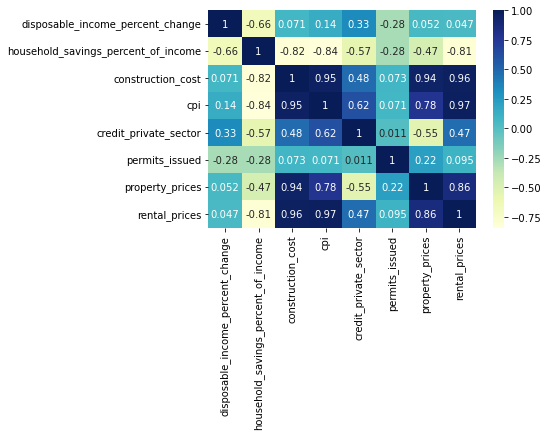

In [71]:
heatmap = sb.heatmap(df_combined.corr(), annot=True, cmap="YlGnBu")

We can see from the heatmap above that: 
- **consumer price index** and **construction costs**
- **property prices** and **construction costs**
- **construction costs** and **rental prices**
- **rental prices** and **property prices** <br> 
have a strong correlation.<br><br> On the opposite end, we see that:<br>
- **consumer prices index** and **household savings**
- **construction costs** and **household savings**
- **rental prices** and **household savings** <br>
have a strong negative correlation.

Let's build scatterplots and line graphs to visualy analyse these relationships

In [72]:
#CPI vs Constrution costs corr

#aggregate all graphs in one
fig_cpi_construction_costs = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {'rowspan':2}],
           [{}, None]],
    subplot_titles=("CPI","CPI vs Construction Costs","Construction costs"))


# line graph for CPI
fig_cpi_construction_costs.add_trace(go.Scatter(
                 x=df_combined['date'],
                 y=df_combined['cpi']), row=1, col=1)


# line graph for construction Costs
fig_cpi_construction_costs.add_trace(go.Scatter(
                 x=df_combined['date'],
                 y=df_combined['construction_cost']), 
                  row=2, col=1)


fig_cpi_construction_costs.add_trace(go.Scatter(
    x=df_combined['cpi'],
    y=df_combined['construction_cost'],
    mode='markers',
    name='Scatter'),
    row=1, col=2)


fig_cpi_construction_costs.show()

In [95]:
#Property Prices vs Constrution costs corr

#aggregate all graphs in one
fig_property_prices_construction_costs = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {'rowspan':2}],
           [{}, None]],
    subplot_titles=("Property Prices", "Property Prices vs Construction Costs","Construction costs"))


# line graph for property prices
fig_property_prices_construction_costs.add_trace(go.Scatter(
                 x=df_combined['date'],
                 y=df_combined['property_prices'], mode='markers'), row=1, col=1)


# line graph for construction Costs
fig_property_prices_construction_costs.add_trace(go.Scatter(
                 x=df_combined['date'],
                 y=df_combined['construction_cost']), 
                  row=2, col=1)


fig_property_prices_construction_costs.add_trace(go.Scatter(
    x=df_combined['property_prices'],
    y=df_combined['construction_cost'],
    mode='markers',
    name='Scatter'),
    row=1, col=2)


fig_property_prices_construction_costs.show()

In [109]:
#Rental prices vs Constrution costs corr

#aggregate all graphs in one
fig_rental_prices_construction_costs = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {'rowspan':2}],
           [{}, None]],
    subplot_titles=("Rental Prices","Rental Prices vs Construction Costs","Construction costs"))


# line graph for rental prices
fig_rental_prices_construction_costs.add_trace(go.Scatter(
                 x=df_combined['date'],
                 y=df_combined['rental_prices']), row=1, col=1)


# line graph for construction Costs
fig_rental_prices_construction_costs.add_trace(go.Scatter(
                 x=df_combined['date'],
                 y=df_combined['construction_cost']), 
                  row=2, col=1)


fig_rental_prices_construction_costs.add_trace(go.Scatter(
    x=df_combined['rental_prices'],
    y=df_combined['construction_cost'],
    mode='markers',
    name='Scatter'),
    row=1, col=2)

fig_rental_prices_construction_costs['layout']['xaxis2']['title']='rental prices'
fig_rental_prices_construction_costs['layout']['yaxis2']['title']='construction cost'
fig_rental_prices_construction_costs.show()

In [96]:
#Rental prices vs property prices corr

#aggregate all graphs in one
fig_rental_prices_property_prices = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {'rowspan':2}],
           [{}, None]],
    subplot_titles=("Rental Prices","Rental Prices vs Property Prices","Property Prices"))


# line graph for Rental Prices
fig_rental_prices_property_prices.add_trace(go.Scatter(
                 x=df_combined['date'],
                 y=df_combined['rental_prices']), row=1, col=1)


# line graph for property prices Costs
fig_rental_prices_property_prices.add_trace(go.Scatter(
                 x=df_combined['date'],
                 y=df_combined['property_prices'], mode='markers'), 
                  row=2, col=1)


fig_rental_prices_property_prices.add_trace(go.Scatter(
    x=df_combined['rental_prices'],
    y=df_combined['property_prices'],
    mode='markers',
    name='Scatter'),
    row=1, col=2)


fig_rental_prices_property_prices.show()

In [103]:
#CPIs vs Household Savings corr

#aggregate all graphs in one
fig_cpi_household_savings = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {'rowspan':2}],
           [{}, None]],
    subplot_titles=("CPI","CPI vs Household Savings","Household Savings"))


# line graph for CPI
fig_cpi_household_savings.add_trace(go.Scatter(
                 x=df_combined['date'],
                 y=df_combined['cpi']), row=1, col=1)


# line graph for household savings
fig_cpi_household_savings.add_trace(go.Scatter(
                 x=df_combined['date'],
                 y=df_combined['household_savings_percent_of_income'], mode='markers'), 
                  row=2, col=1)


fig_cpi_household_savings.add_trace(go.Scatter(
    x=df_combined['rental_prices'],
    y=df_combined['household_savings_percent_of_income'],
    mode='markers',
    name='Scatter'),
    row=1, col=2)


fig_cpi_household_savings.show()

In [105]:
#Household Savings vs Constrution costs corr

#aggregate all graphs in one
fig_household_savings_construction_costs = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {'rowspan':2}],
           [{}, None]],
    subplot_titles=("Household Savings","Household Savings vs Construction Costs","Construction costs"))


# line graph for household savings
fig_household_savings_construction_costs.add_trace(go.Scatter(
                 x=df_combined['date'],
                 y=df_combined['household_savings_percent_of_income'], mode='markers'), row=1, col=1)


# line graph for construction Costs
fig_household_savings_construction_costs.add_trace(go.Scatter(
                 x=df_combined['date'],
                 y=df_combined['construction_cost']), 
                  row=2, col=1)


fig_household_savings_construction_costs.add_trace(go.Scatter(
    x=df_combined['household_savings_percent_of_income'],
    y=df_combined['construction_cost'],
    mode='markers',
    name='Scatter'),
    row=1, col=2)


fig_household_savings_construction_costs.show()

In [106]:
#Household Savings vs Rental Prices corr

#aggregate all graphs in one
fig_household_savings_rental_prices = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {'rowspan':2}],
           [{}, None]],
    subplot_titles=("Household Savings","Household Savings vs Construction Costs","Construction costs"))


# line graph for household savings
fig_household_savings_rental_prices.add_trace(go.Scatter(
                 x=df_combined['date'],
                 y=df_combined['household_savings_percent_of_income'], mode='markers'), row=1, col=1)


# line graph for rental prices
fig_household_savings_rental_prices.add_trace(go.Scatter(
                 x=df_combined['date'],
                 y=df_combined['rental_prices']), 
                  row=2, col=1)


fig_household_savings_rental_prices.add_trace(go.Scatter(
    x=df_combined['household_savings_percent_of_income'],
    y=df_combined['rental_prices'],
    mode='markers',
    name='Scatter'),
    row=1, col=2)


fig_household_savings_rental_prices.show()

# SPLINE TO CONVERT TIME PERIODS

In [ ]:
# we want to test oil prices (X)  and their potential impact on prices (Y1) and wages (Y2)
variables = ['oil_price', 'sticky_price_index', 'employment_cost']
data = data.dropna()
data = data[variables]

In [ ]:
# split data into training and test data
train, test = train_test_split(data[variables], test_size= 0.2, random_state= 3)

# we will use granger causality before even building a model
# one of the assumptions of granger causality is that the series is stationary
# But let's use Augmented Dickey-Fuller Test to verify

In [ ]:
for variable in variables:
    result = adfuller(train[variable])
    print(f'{variable} Test Statistics: {result[0]}')
    print(f'{variable} p-value: {result[1]}')
    print(f'{variable} critical_values: {result[4]}')
    if result[1] > 0.05:
        print(f"{variable} Series is not stationary\n\n")
    else:
        print(f"{variable} Series is stationary\n\n")

# Since all series are stationary, we can now proceed with granger causality test
# use granger causality test to check if there is any relationship between the series before building a model

In [ ]:
max_lag = 12
results_Y1 = grangercausalitytests(train[['oil_price', 'sticky_price_index']], max_lag, verbose=False)


# print p-values and test statistics for each lag order
for lag in range(1, max_lag + 1):
    p_value = results_Y1[lag][0]['ssr_chi2test'][1]
    test_statistic = results_Y1[lag][1][0]
    print(f"Lag Order: {lag} | Test Statistic: {test_statistic} | p-value: {p_value}")


results_Y2 = grangercausalitytests(train[['oil_price', 'employment_cost']], max_lag, verbose=False)
# print p-values and test statistics for each lag order
for lag in range(1, max_lag + 1):
    p_value = results_Y2[lag][0]['ssr_chi2test'][1]
    test_statistic = results_Y2[lag][1][0]
    print(f"Lag Order: {lag} | Test Statistic: {test_statistic} | p-value: {p_value}")